# Import Library

In [1]:
# load necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Load Cluster Data

In [2]:
df_campaign_final = pd.read_csv('data/marketing_campaign_final.csv')
df_campaign_final.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Response,Age,Children,TotalSpending,NumOfTransactions,NumOfAcceptedCmp,CVR,AgeGroup,IncomeGroup,SpendingGroup,TransactionGroup,Cluster
0,S1,Lajang,58138000.0,58,7,0,1,65,0,1617000,25,0,0.142857,61-70,50M-60M,1.5M-2M,20-30,1
1,S1,Lajang,46344000.0,38,5,0,0,68,2,27000,6,0,0.000000,61-70,40M-50M,0-0.5M,0-10,3
2,S1,Bertunangan,71613000.0,26,4,0,0,57,0,776000,21,0,0.000000,51-60,70M-80M,0.5M-1M,20-30,1
3,S1,Bertunangan,26646000.0,26,6,0,0,38,1,53000,8,0,0.000000,31-40,20M-30M,0-0.5M,0-10,0
4,S3,Menikah,58293000.0,94,5,0,0,41,1,422000,19,0,0.000000,41-50,50M-60M,0-0.5M,10-20,1


In [3]:
df_campaign_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2049 non-null   object 
 1   Marital_Status     2049 non-null   object 
 2   Income             2049 non-null   float64
 3   Recency            2049 non-null   int64  
 4   NumWebVisitsMonth  2049 non-null   int64  
 5   Complain           2049 non-null   int64  
 6   Response           2049 non-null   int64  
 7   Age                2049 non-null   int64  
 8   Children           2049 non-null   int64  
 9   TotalSpending      2049 non-null   int64  
 10  NumOfTransactions  2049 non-null   int64  
 11  NumOfAcceptedCmp   2049 non-null   int64  
 12  CVR                2049 non-null   float64
 13  AgeGroup           2049 non-null   object 
 14  IncomeGroup        2049 non-null   object 
 15  SpendingGroup      2049 non-null   object 
 16  TransactionGroup   2049 

# Insights

## Cluster by Age Group

In [4]:
cluster_by_age = df_campaign_final.groupby(['Cluster', 'AgeGroup'])['CVR'].mean()
cluster_by_age = cluster_by_age.unstack(level=0).fillna(0.0)
cluster_by_age.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_by_age

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
AgeGroup,,,,
20-30,0.011111,0.000000,0.200000,0.000000
31-40,0.018950,0.000000,0.223628,0.000000
41-50,0.014590,0.009236,0.119738,0.016667
51-60,0.014637,0.021123,0.099370,0.013420
61-70,0.000000,0.029211,0.142804,0.010391
71-80,0.000000,0.045705,0.147287,0.008777


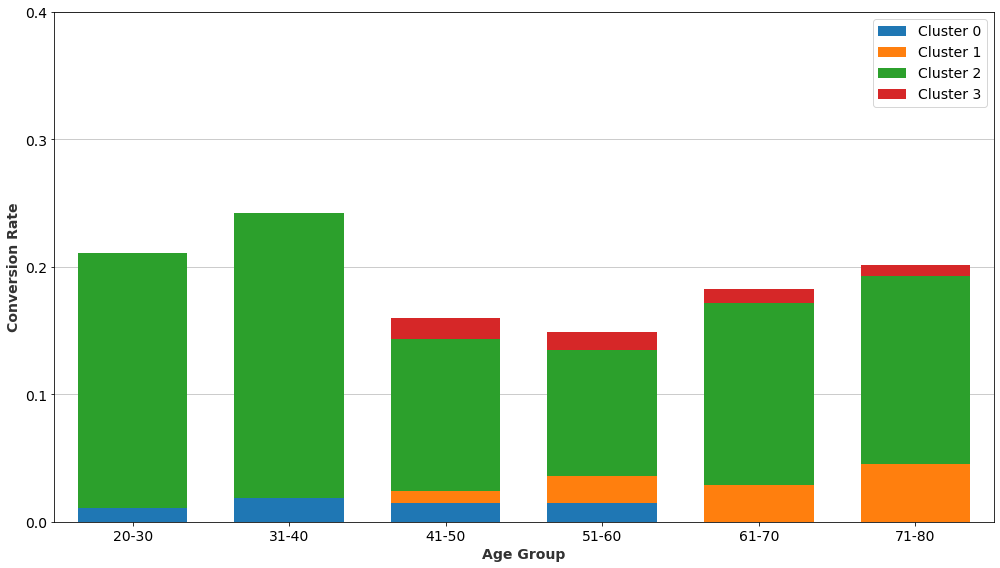

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
cluster_by_age.plot(kind='bar', stacked=True, width=0.7, ax=ax)

ax.set_xlabel('Age Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 5.5) # membatasi x-axis
plt.ylim(0, 0.4) # membatasi y-axis
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0.45, 0.1))

ax.legend(fontsize=14)
plt.tight_layout()
plt.savefig('img/cluster_by_age.png')
plt.show()

## Cluster by Number of Children

In [6]:
cluster_by_children = df_campaign_final.groupby(['Cluster', 'Children'])['CVR'].mean()
cluster_by_children = cluster_by_children.unstack(level=0).fillna(0.0)
cluster_by_children.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_by_children

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Children,,,,
0,0.017877,0.060101,0.170561,0.011199
1,0.016270,0.012876,0.038004,0.010937
2,0.011201,0.017802,0.048980,0.015961
3,0.000000,0.035714,0.000000,0.000000


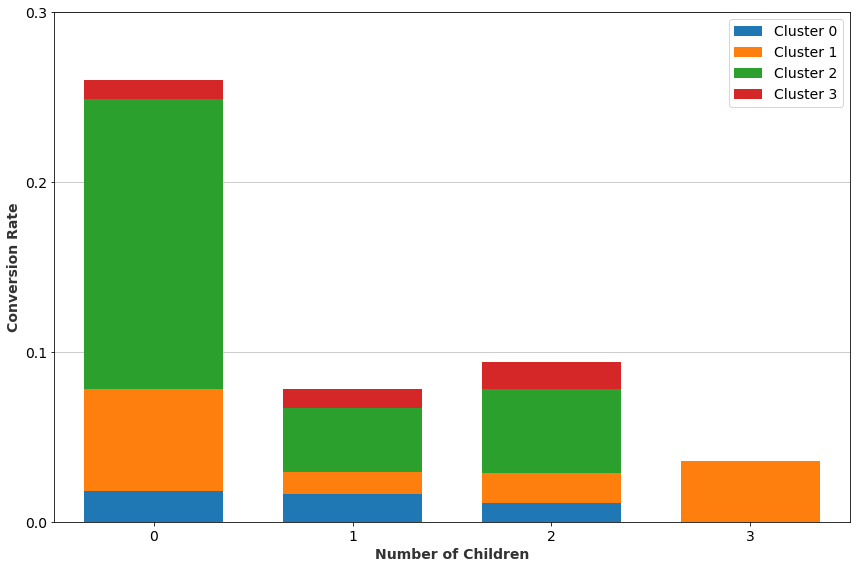

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
cluster_by_children.plot(kind='bar', stacked=True, width=0.7, ax=ax)

ax.set_xlabel('Number of Children', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 3.5) # membatasi x-axis
plt.ylim(0, 0.3) # membatasi y-axis
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0.35, 0.1))

ax.legend(fontsize=14)
plt.tight_layout()
plt.savefig('img/cluster_by_children.png')
plt.show()

## Cluster by Income Group

In [8]:
cluster_by_income = df_campaign_final.groupby(['Cluster', 'IncomeGroup'])['CVR'].mean()
cluster_by_income = cluster_by_income.unstack(level=0).fillna(0.0)
cluster_by_income.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_by_income

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
IncomeGroup,,,,
0M-10M,0.012401,0.000000,0.000000,0.000000
10M-20M,0.015070,0.000000,0.000000,0.000000
20M-30M,0.016840,0.000000,0.000000,0.006054
30M-40M,0.016085,0.000000,0.000000,0.020940
40M-50M,0.014894,0.035979,0.000000,0.012320
50M-60M,0.000000,0.023731,0.000000,0.006378
60M-70M,0.000000,0.021429,0.093745,0.000000
70M-80M,0.000000,0.014848,0.097087,0.000000
80M-90M,0.000000,0.000000,0.188114,0.000000


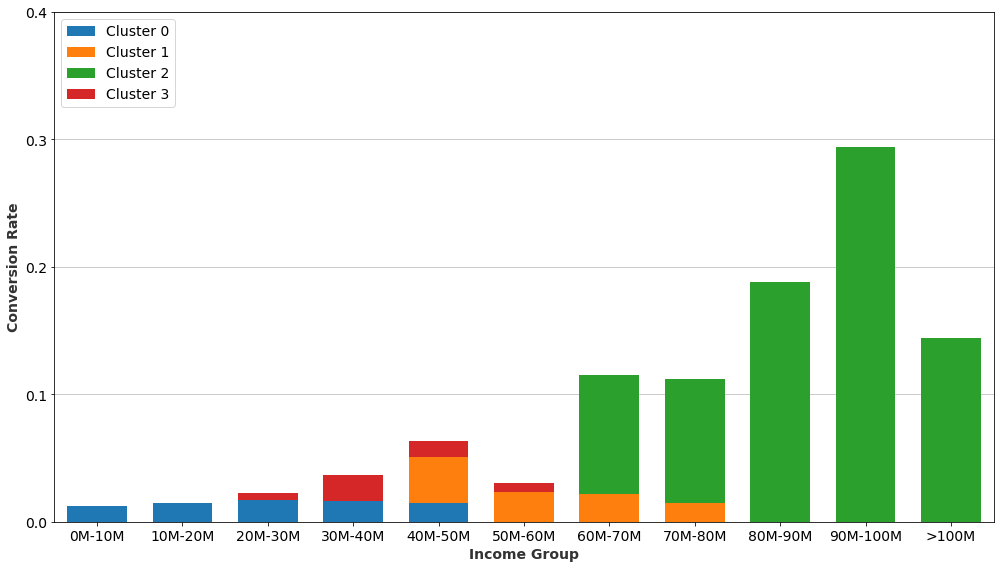

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(14,8))
cluster_by_income.plot(kind='bar', stacked=True, width=0.7, ax=ax)

ax.set_xlabel('Income Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 10.5) # membatasi x-axis
plt.ylim(0, 0.4) # membatasi y-axis
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0.45, 0.1))

ax.legend(fontsize=14, loc='upper left')
plt.tight_layout()
plt.savefig('img/cluster_by_income.png')
plt.show()

## Cluster by Spending Group

In [10]:
cluster_by_spending = df_campaign_final.groupby(['Cluster', 'SpendingGroup'])['CVR'].mean()
spending_order = ['0-0.5M', '0.5M-1M', '1M-1.5M', '1.5M-2M', '2M-2.5M', '>2.5M']
cluster_by_spending = cluster_by_spending.unstack(level=0).fillna(0.0).reindex(spending_order)
cluster_by_spending.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_by_spending

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
SpendingGroup,,,,
0-0.5M,0.015228,0.018743,0.000000,0.012508
0.5M-1M,0.052381,0.013454,0.099864,0.015873
1M-1.5M,0.000000,0.032587,0.110361,0.000000
1.5M-2M,0.000000,0.124603,0.177018,0.000000
2M-2.5M,0.000000,0.000000,0.212103,0.000000
>2.5M,0.000000,0.000000,0.416667,0.000000


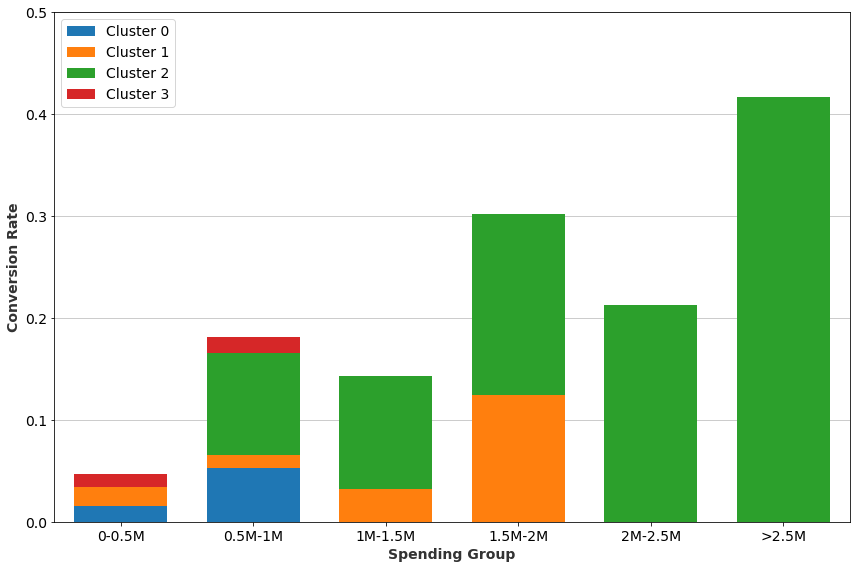

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
cluster_by_spending.plot(kind='bar', stacked=True, width=0.7, ax=ax)

ax.set_xlabel('Spending Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 5.5) # membatasi x-axis
plt.ylim(0, 0.5) # membatasi y-axis
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0.55, 0.1))

ax.legend(fontsize=14, loc='upper left')
plt.tight_layout()
plt.savefig('img/cluster_by_spending.png')
plt.show()

## Cluster by Transaction Group

In [12]:
cluster_by_trx = df_campaign_final.groupby(['Cluster', 'TransactionGroup'])['CVR'].mean()
cluster_by_trx = cluster_by_trx.unstack(level=0).fillna(0.0)
cluster_by_trx.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_by_trx

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
TransactionGroup,,,,
0-10,0.014081,0.000000,0.000000,0.008379
10-20,0.024612,0.020249,0.160802,0.016487
20-30,0.000000,0.024515,0.135511,0.100794
30-40,0.000000,0.013258,0.072789,0.000000


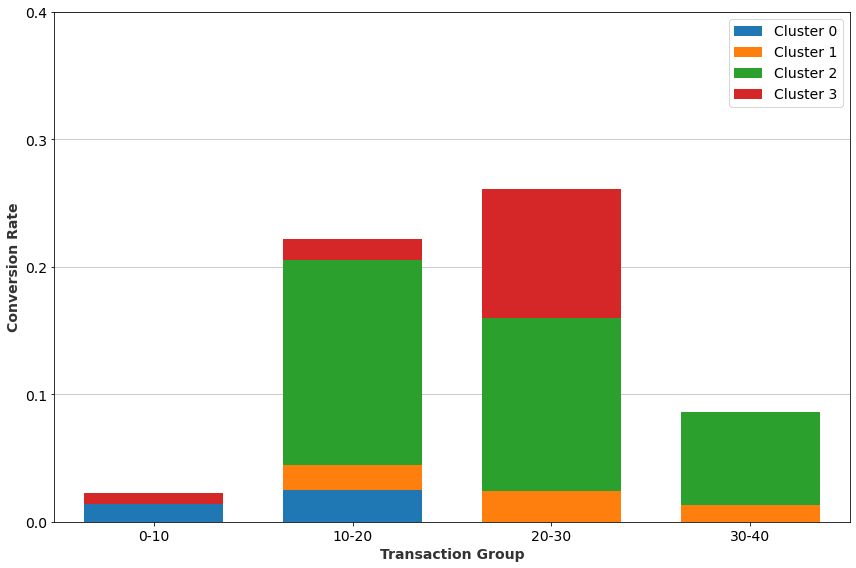

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
cluster_by_trx.plot(kind='bar', stacked=True, width=0.7, ax=ax)

ax.set_xlabel('Transaction Group', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 3.5) # membatasi x-axis
plt.ylim(0, 0.4) # membatasi y-axis
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0.45, 0.1))

ax.legend(fontsize=14)
plt.tight_layout()
plt.savefig('img/cluster_by_transaction.png')
plt.show()

## Cluster by Number of Accepted Campaign

In [14]:
cluster_by_acceptedcmp = df_campaign_final.groupby(['Cluster', 'NumOfAcceptedCmp'])['CVR'].mean()
cluster_by_acceptedcmp = cluster_by_acceptedcmp.unstack(level=0).fillna(0.0)
cluster_by_acceptedcmp.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_by_acceptedcmp

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
NumOfAcceptedCmp,,,,
0,0.010675,0.015752,0.076076,0.009403
1,0.062946,0.043703,0.155301,0.041434
2,0.142857,0.070055,0.231409,0.089286
3,0.000000,0.125000,0.305871,0.000000
4,0.000000,0.000000,0.386667,0.000000


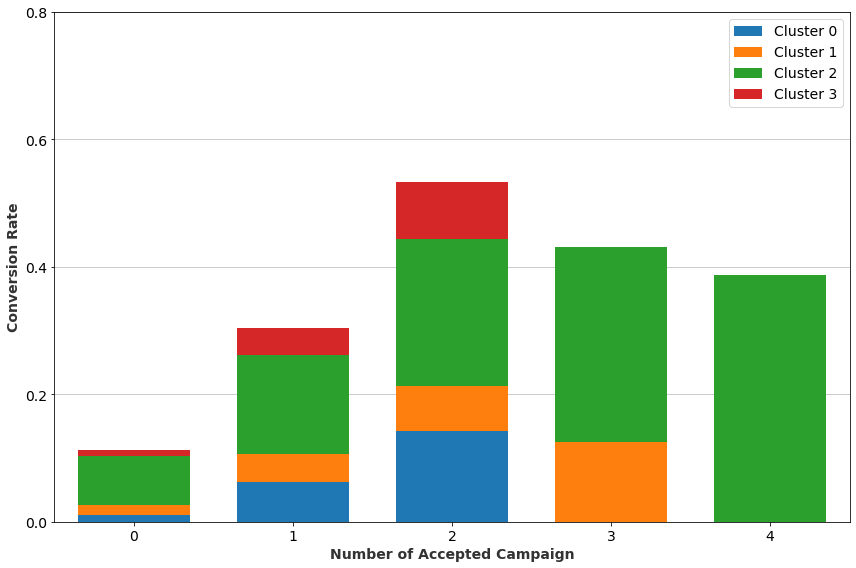

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(12,8))
cluster_by_acceptedcmp.plot(kind='bar', stacked=True, width=0.7, ax=ax)

ax.set_xlabel('Number of Accepted Campaign', fontsize=14, fontweight='bold', alpha=0.8)
ax.set_ylabel('Conversion Rate', fontsize=14, fontweight='bold', alpha=0.8)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(axis='y', alpha=0.8)
ax.set_axisbelow(True)

plt.xlim(-0.5, 4.5) # membatasi x-axis
plt.ylim(0, 0.8) # membatasi y-axis
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 0.85, 0.2))

ax.legend(fontsize=14)
plt.tight_layout()
plt.savefig('img/cluster_by_acceptedcmp.png')
plt.show()

## Conclusion

1. Cluster 0 adalah orang yang berusia 41-80 tahun, memiliki jumlah anak maksimal 2, mempunyai pendapatan diantara 20-60 juta, memiliki pengeluaran dibawah 1 juta, bertransaksi maksimal 20 kali, dan telah menyetujui jumlah campaign maksimal 2 kali.
2. Cluster 1 adalah orang yang berusia 41-80 tahun, memiliki jumlah anak maksimal 3, mempunyai pendapatan diantara 40-80 juta, memiliki pengeluaran dibawah 2 juta, bertransaksi antara 10-40 kali, dan telah menyetujui jumlah campaign maksimal 3 kali.
3. Cluster 2 adalah orang yang berusia diatas 20 tahun, memiliki jumlah anak maksimal 2, mempunyai pendapatan diatas 60 juta, memiliki pengeluaran diatas 500 ribu, bertransaksi diatas 10 kali, dan selalu menyetujui campaign yang diberikan.
4. Cluster 3 adalah orang yang berusia 20-60 tahun, memiliki jumlah anak maksimal 2, mempunyai pendapatan dibawah 50 juta, memiliki pengeluaran dibawah 1 juta, bertransaksi paling banyak 20-30 kali, dan telah menyetujui jumlah campaign maksimal 2 kali.

Karena pendapatan dan pengeluaran saling berhubungan maka dapat kita simpulkan bahwa:
- High Spender sebagai cluster 2
- Medium Spender sebagai cluster 1
- Low Spender sebagai cluster 0
- Risk of Churn sebagai cluster 3

In [17]:
def get_segment_name(x):
    if x==0:
        return 'Low Spender'
    if x==1:
        return 'Medium Spender'
    if x==2:
        return 'High Spender'
    if x==3:
        return 'Risk of Churn'
df_campaign_final['Segment'] = df_campaign_final['Cluster'].apply(lambda x : get_segment_name(x))
df_campaign_final['Segment'].value_counts()

Medium Spender    546
Risk of Churn     544
Low Spender       523
High Spender      436
Name: Segment, dtype: int64

# Recommendation

1. Penggunaan clustering dapat mempermudah retargeting marketing campaign karena masing-masing cluster lebih terlihat jelas terutama dari faktor pendapatan dan pengeluaran yang berdampak posisif pada tingkat konversi.
2. Untuk kelompok High Spender walaupun memiliki tingkat konversi tertinggi tetapi harus tetap dilakukan treatment yang sama dengan kelompok lainnnya agar revenue yang didapatkan tetap terjaga.
3. Untuk kelompok Medium Spender hanya sedikit berbeda dengan High Spender dimana pendapatan lebih sedikit sehingga pengeluaran juga lebih sedikit. Namun transaksi yang dilakukan cukup sering, hal ini dimungkinkan transaksi yang dilakukan biasa menggunakan promo atau diskon sehingga jumlah promo atau diskon yang dibuat perlu dibatasi.
4. Untuk kelompok Low Spender terlihat masih ragu dalam melakukan transaksi karena tingkat konversinya masih kecil walaupun transaksi yang dilakukan masih wajar mengingat jumlah pendapatan dan pengeluaran yang dimiliki. Kelompok ini perlu treatment tambahan agar menjadi lebih yakin dalam melakukan transaksi seperti memberi promo atau diskon tambahan yang disesuaikan.
5. Untuk kelompok Risk of Churn adalah kelompok yang perlu diperhatikan karena tingkat konversi paling rendah dikarenakan pendapatan yang dihasilkan cukup paling kecil sehingga perlu dilakukan treament ekstra seperti preferensi apa yang paling diminati agar transaksi yang dilakukan naik tapi masih dalam kategori hemat agar tidak beralih ke tempat lain.